In [1]:
%matplotlib inline

from IPython.display import Audio, display
import matplotlib.pyplot as plt
import quilt


# Install data from quilt

In [2]:
quilt.install('gte620v/dsatl2018_talk')
data = quilt.load('gte620v/dsatl2018_talk')
sample_rate = 16_000
data

gte620v/dsatl2018_talk already installed.
Overwrite? (y/n) n


<GroupNode>
README
df_train
x_test
y_test

# Look at data

We have a dataframe with labels (`df_train`), a one-hot encoded set of labels in numpy (`y_test`), and 16,000 sample wavefiles (`x_test`).

In [3]:
df = data.df_train()
df.head(4)

,command,wav_ran,label
0,on,12390.0,on
1,zero,26141.0,unknown
2,bird,12721.0,unknown
3,off,9985.0,off


In [4]:
df.command.value_counts()

sheila     7
tree       7
zero       6
up         6
on         6
silence    5
happy      4
wow        4
go         4
eight      4
left       4
no         4
down       4
one        3
bird       3
off        3
right      3
six        3
three      3
five       3
stop       2
nine       2
two        2
four       2
yes        2
seven      1
bed        1
marvin     1
dog        1
Name: command, dtype: int64

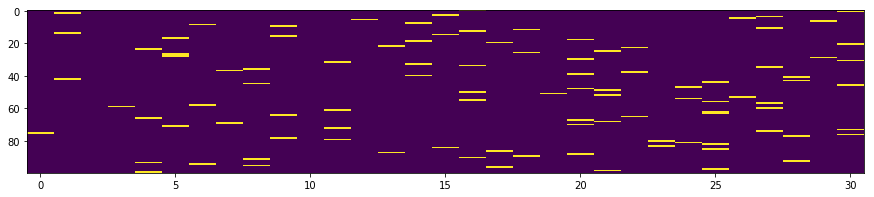

In [5]:


plt.rcParams['figure.figsize'] = (15.0, 3.0)
plt.imshow(data.y_test(),aspect='auto')

# Build a simple plot function

In [6]:
def plot_row(idx):
    wav = data.x_test()[idx, 0, :]
    command = df.loc[idx, 'command']
    plt.plot(wav)
    plt.title(command)
    plt.show()
    plt.specgram(wav, Fs=sample_rate, NFFT=32, noverlap=24)
    plt.title(command)
    plt.show()
    display(Audio(wav, autoplay=True, rate=sample_rate))

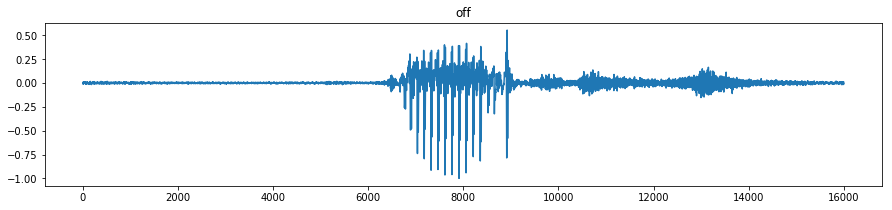

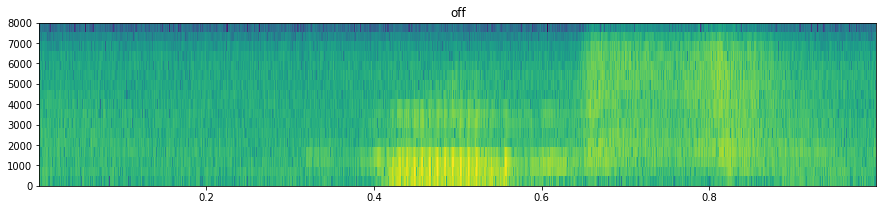

In [7]:
plot_row(3)

# Loop through some random rows

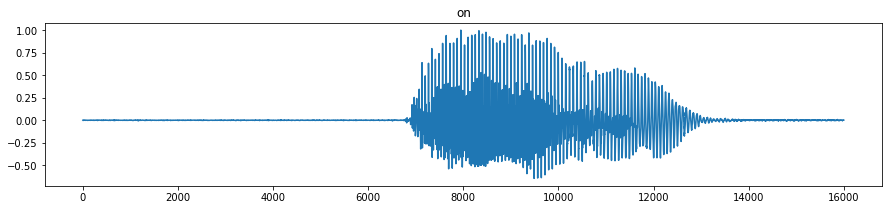

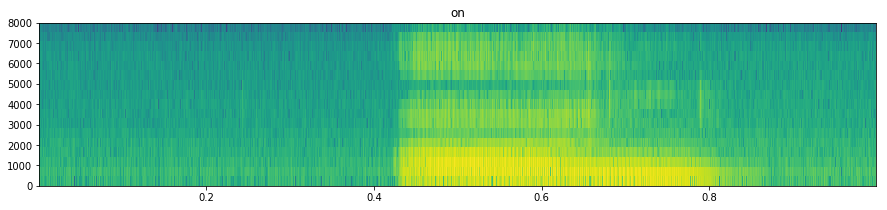

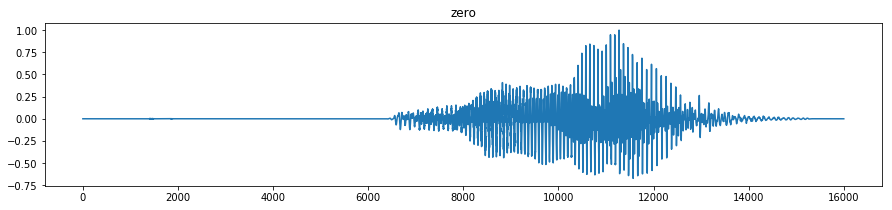

/Users/bob/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7564: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


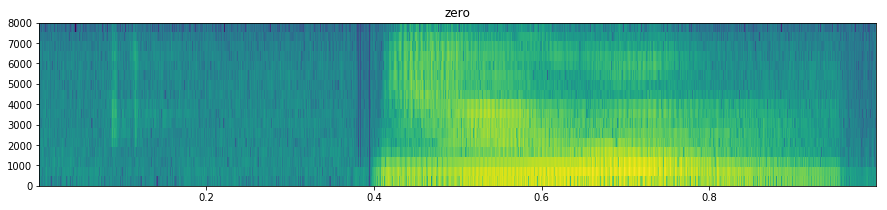

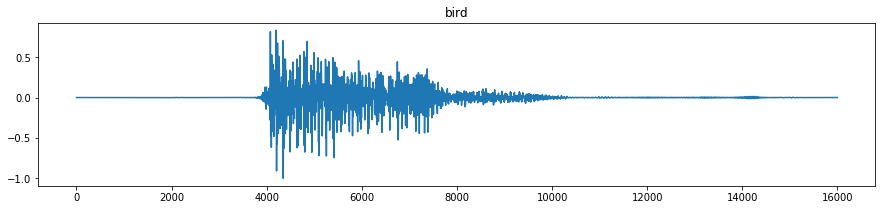

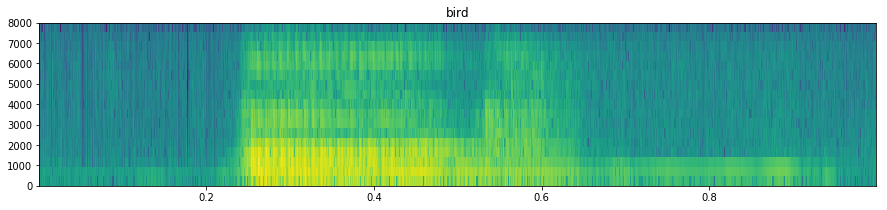

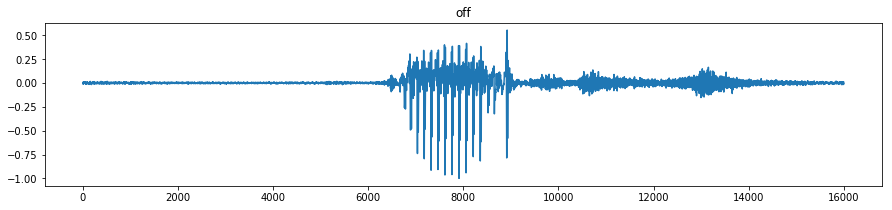

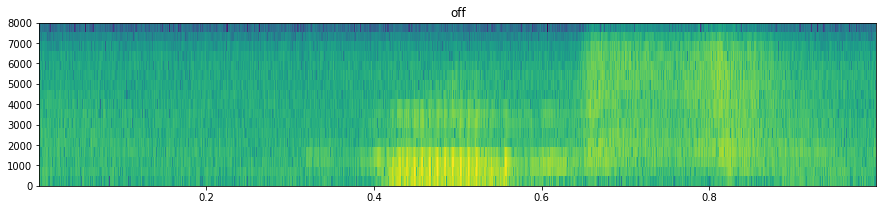

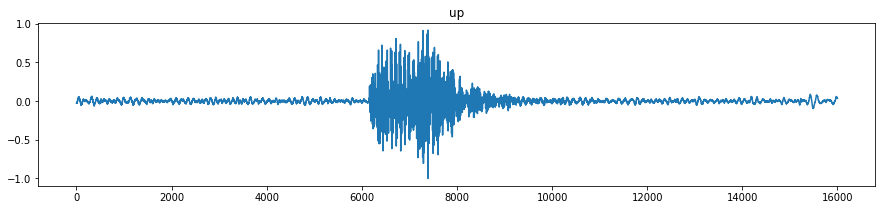

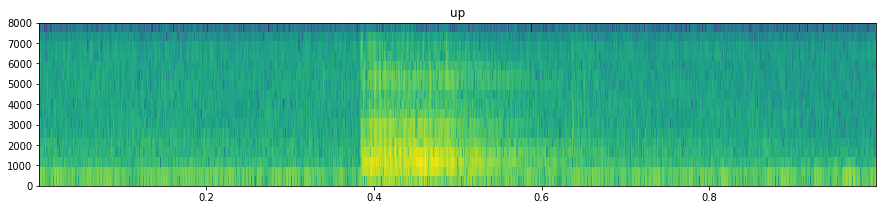

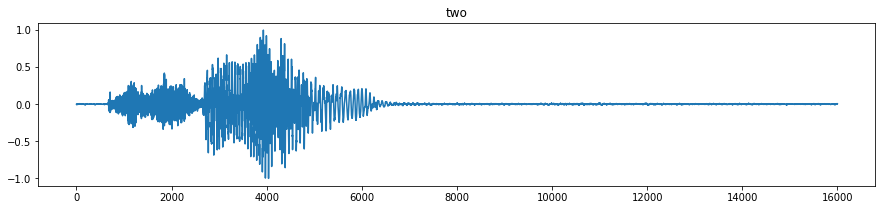

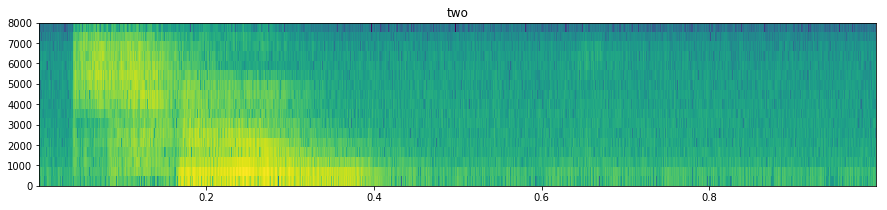

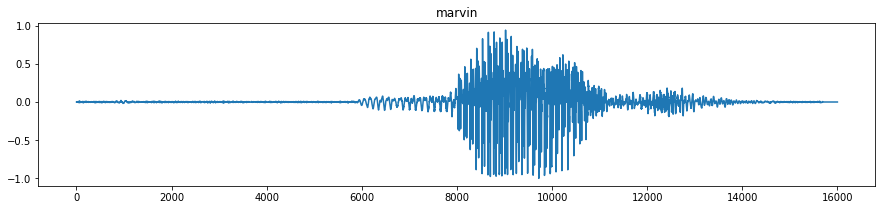

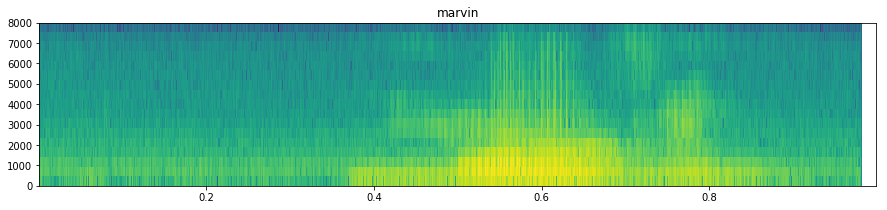

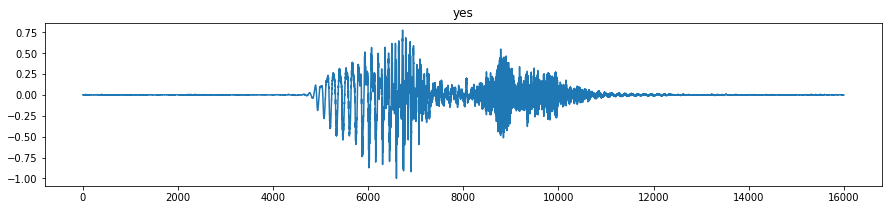

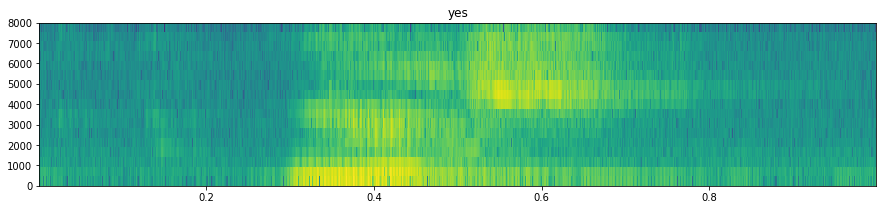

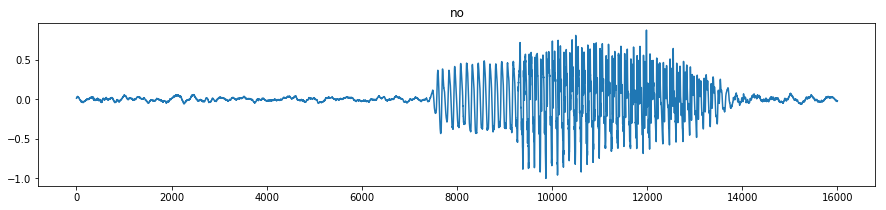

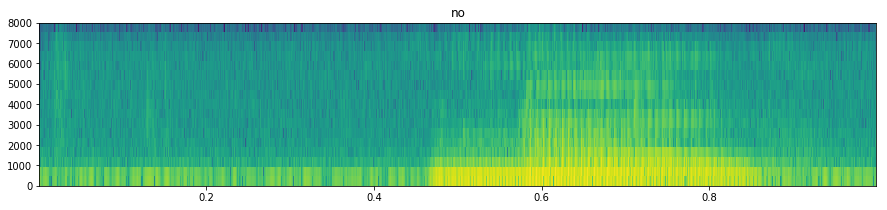

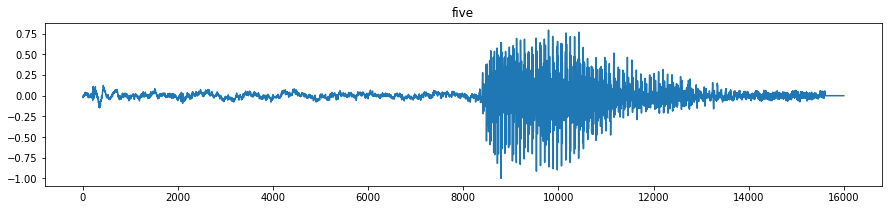

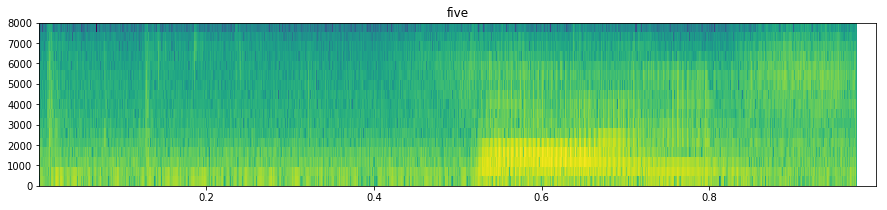

In [8]:
for idx in range(10):
    plot_row(idx)

# Loop through a single word

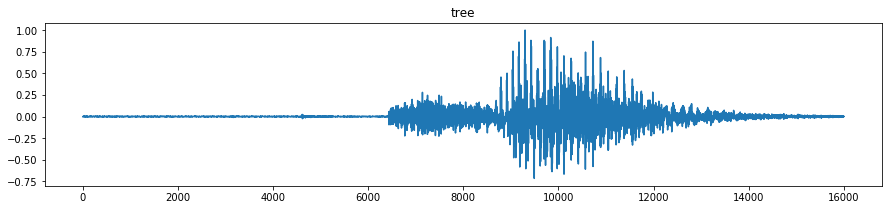

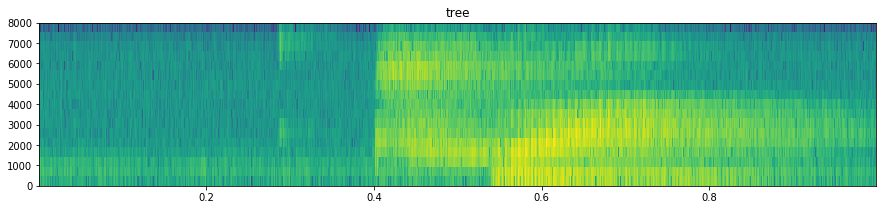

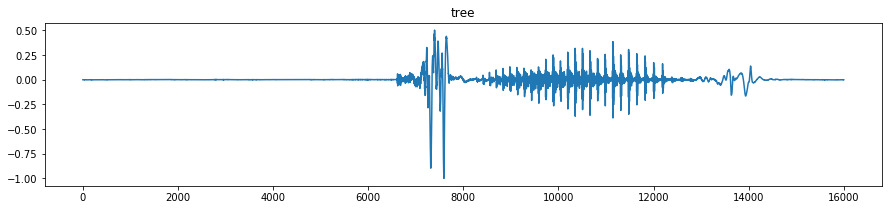

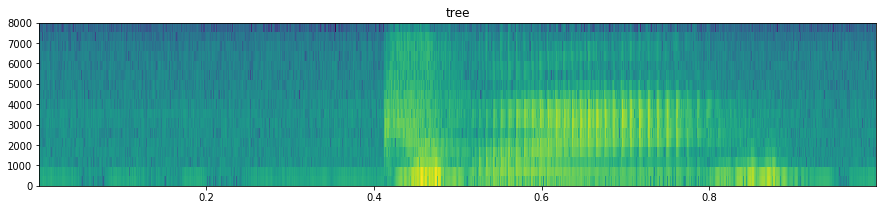

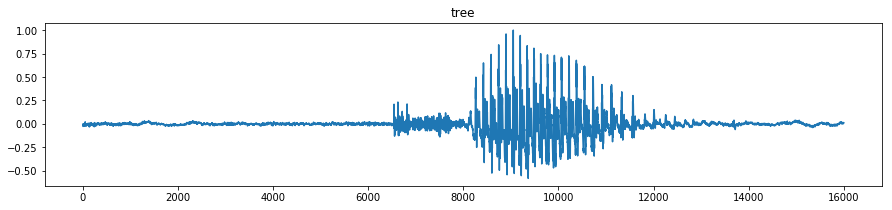

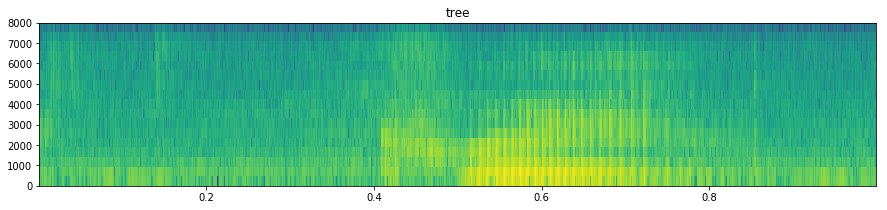

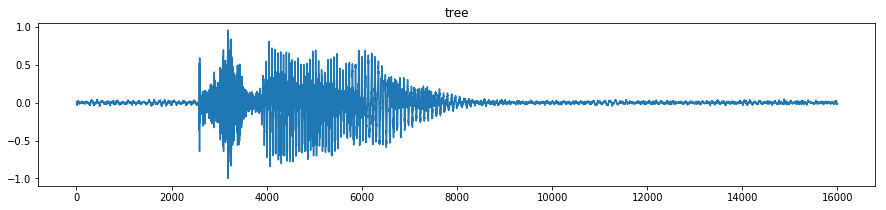

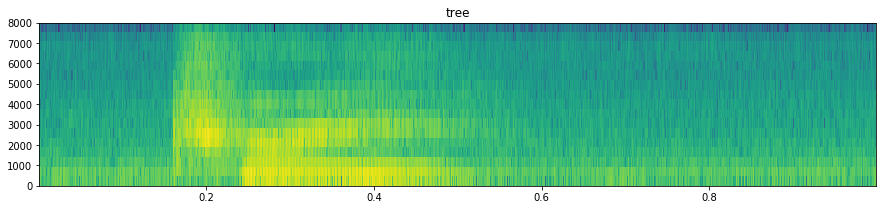

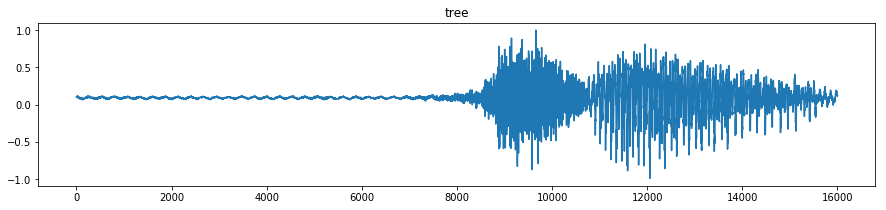

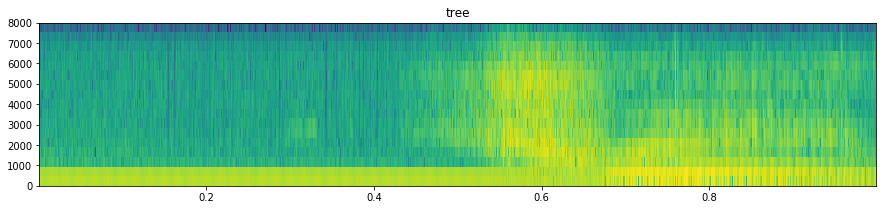

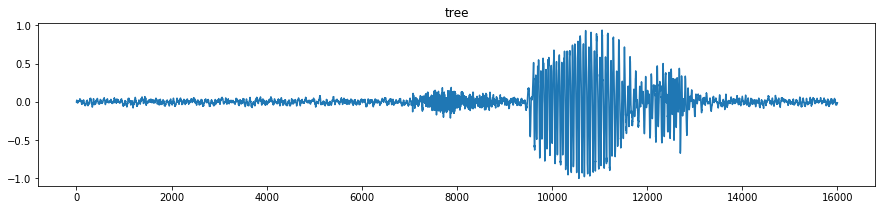

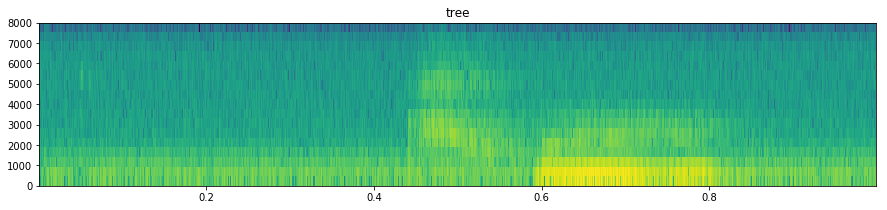

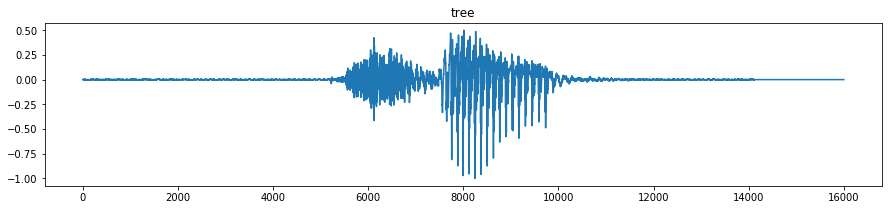

/Users/bob/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7564: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


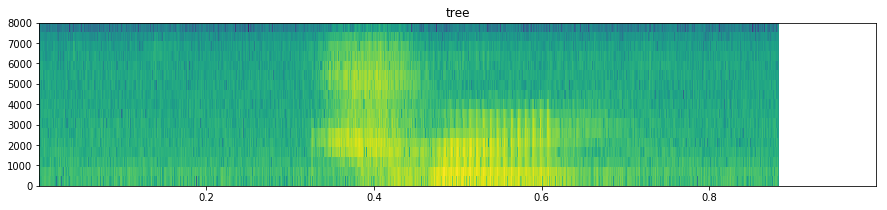

In [9]:
# word = 'sheila'
word = 'tree'
for idx in df[df.command==word].index.values:
    plot_row(idx)